In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
import itertools
import matplotlib.image as mpimg
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerTuple
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
def load_json_to_df(path):
    path = 'data/'+path
    with open(path, 'rb') as file:
        data = json.load(file)
    return pd.DataFrame(data)

short_title_sdgs = ['SDG 1 - No poverty', 
                    'SDG 2 - Zero hunger', 
                    'SDG 3 - Good health and well-being', 
                    'SDG 4 - Quality education', 
                    'SDG 5 - Gender equality', 
                    'SDG 6 - Clean water and sanitation', 
                    'SDG 7 - Affordable and clean energy', 
                    'SDG 8 - Decent work and economic growth', 
                    'SDG 9 - Industry, innovation and infrastructure', 
                    'SDG 10 - Reduced inequalities', 
                    'SDG 11 - Sustainable cities and communities', 
                    'SDG 12 - Responsible consumption and production', 
                    'SDG 13 - Climate action', 
                    'SDG 14 - Life below water', 
                    'SDG 15 - Life on land', 
                    'SDG 16 - Peace, justice, and strong institutions', 
                    'SDG 17 - Partnerships for the goals',
                    'Overall SDG score']

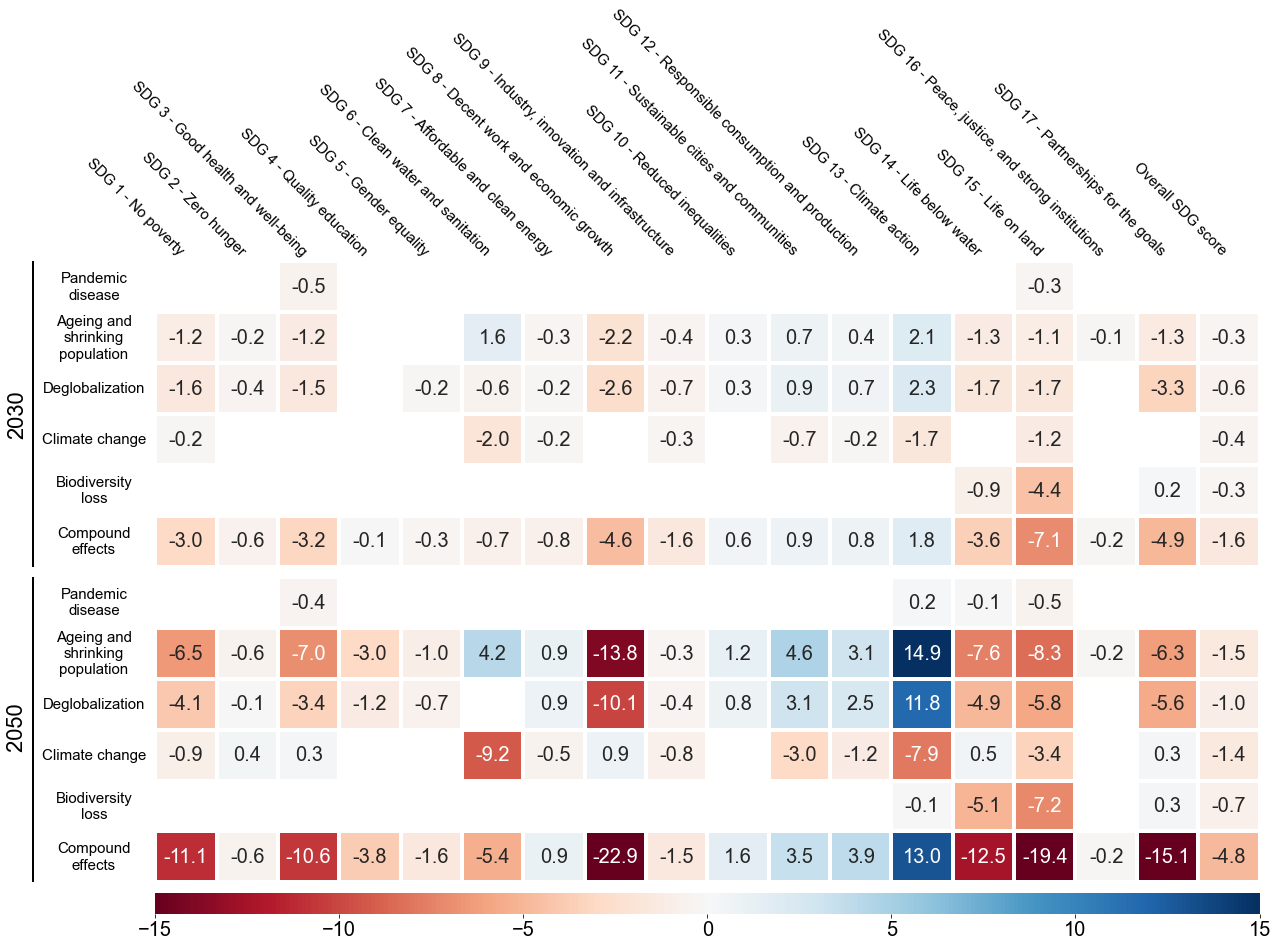

In [3]:
data_2030 = load_json_to_df('fig_2_2030.json')
data_2050 = load_json_to_df('fig_2_2050.json')
data_2030[list(data_2030.columns)]=data_2030[list(data_2030.columns)].astype(float)
data_2050[list(data_2050.columns)]=data_2050[list(data_2050.columns)].astype(float)

fig = plt.figure(figsize=(22,12))
grid = plt.GridSpec(21, 20, hspace=.5, wspace=0.1)
axes={}
plt.rcParams["font.family"] = "Arial"


axes[1] = fig.add_subplot(grid[:10,2:],zorder=2)
axes[2] = fig.add_subplot(grid[10:20,2:])
axes[3] = fig.add_subplot(grid[20,2:])

# add heatmap
for num,data in enumerate([data_2030, data_2050]):
    sns.heatmap(data, vmax=15,vmin=-15, annot=True, annot_kws={'size':20}, mask=(data>=-0.1) & (data<=0.1), fmt=".1f",linewidths=4,cmap='RdBu',cbar_ax=axes[3], cbar_kws={"orientation": "horizontal"}, ax=axes[num+1])
    axes[num+1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False, labelsize=20)
    if num==0:
        axes[num+1].set_xticklabels(short_title_sdgs,rotation=315,ha='right',va='bottom',size=15)
    else:
        axes[num+1].set_xticklabels([])
    axes[num+1].set_yticklabels([])
    axes[num+1].tick_params(axis='x', color='r', length=0)


    axes[num+1].set_yticks([])
axes[3].tick_params(labelsize=20)

# # add y-axis labels
axes[4] = fig.add_subplot(grid[:10,:2])
axes[4].axvline(0,linewidth=3,color='black')
axes[4].spines[:].set_visible(False)
axes[4].axis('off')

axes[5] = fig.add_subplot(grid[10:20,:2])
axes[5].axvline(0,linewidth=3,color='black')
axes[5].spines[:].set_visible(False)
axes[5].axis('off')

ssp_labels =  ['Pandemic\ndisease', 'Ageing and\nshrinking\npopulation', 'Deglobalization', 'Climate change', 'Biodiversity\nloss', 'Compound\neffects']
year_labels =['2030', ' 2050']
for i,j in itertools.product(range(2),range(6)):
    axes[i+1].text(-1, 0.5+j, ssp_labels[j], fontsize = 15, ha = 'center', va = 'center')
for i in range(2):
    axes[i+1].text(-2.25, 3, year_labels[i], fontsize = 22, ha = 'center', va = 'center',rotation=90)

fig.savefig('output/fig_2.pdf',dpi=300,bbox_inches='tight')

In [4]:
def converse_int_to(num,n):
    s=''
    while num>0:
        s=str(num%n)+s
        num=num//n
    return s
def converse_to_int(num,n):
    s=0
    num = str(num)[::-1]
    lens=len(num)
    for i in range(len(num)):
        s=s+int(num[i])*pow(n,i)
    return s


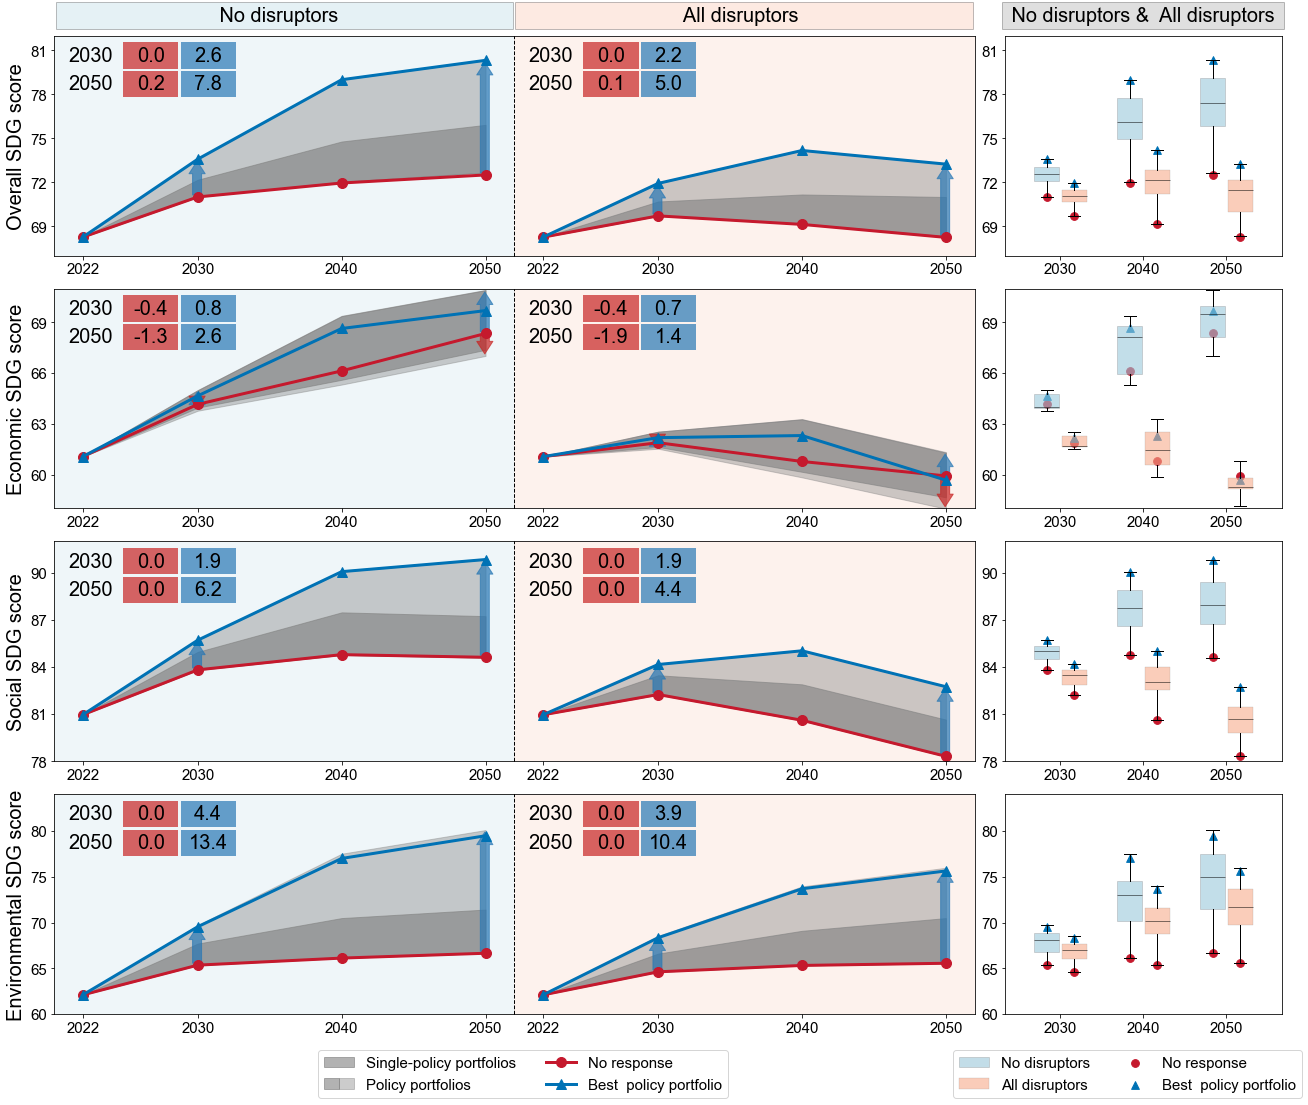

In [5]:
df = load_json_to_df('fig_3.json')
df.columns=[int(i) for i in df.columns[:-3]] + list(df.columns[-3:])

dimensions, disruptors = ['Overall', 'Ec','S','En'], ['0', '7']
arrow_style="Simple,head_length=12.6,head_width=16.2,tail_width=9"
ylabels=['Overall SDG score','Economic SDG score', 'Social SDG score','Environmental SDG score']
ylimits = [(68,83), (68,77), (60,73), (57,70), (80,95),(78,92),(60,84), (60,79)]
ylimits = [(67,82), (67,82), (58,71), (58,71), (78,92),(78,92),(60,84), (60,84)]
titles = ['                             No disruptors                               ', 
          '                              All disruptors                               ',
          ' No disruptors &  All disruptors ']

bset_run = '22122'
bset_run_int = str(converse_to_int(bset_run,3))
isolated_runs  = ['10000','20000','01000','02000', '00100','00200', '00010','00020', '00001','00002']
isolated_runs_int = [str(converse_to_int(i,3)) for i in isolated_runs]

fig = plt.figure(figsize=(22,18))
plt.rcParams["font.family"] = "Arial"
grid = plt.GridSpec(4, 40,wspace=0,hspace=.15)
axes={}
x= [2022,2030,2040,2050]

for i, j in itertools.product(range(4),range(2)):
    dimension, disruptor = dimensions[i], disruptors[j]
    axes[i,j]= fig.add_subplot(grid[i,0+j*15:15+j*15])
    if j==0:
        axes[i,j].patch.set_facecolor('#9ac9db')
    else:
        axes[i,j].patch.set_facecolor('#f8ac8c')
    axes[i,j].patch.set_alpha(0.15)
    
    value_pol0 = df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy=='0')].get(x).values[0]*100
    value_polmax = df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy==bset_run_int)].get(x).values[0]*100

    c, = axes[i,j].plot(x,value_pol0,lw=3, color = '#C5192D' ,marker='o', markersize =10)
    d, = axes[i,j].plot(x,value_polmax,lw=3, color = '#0072B5', marker='^', markersize =10)

    # if j==1:
    #     baseline = df[(df.Dimension==dimension)&(df.disruptor=='0')&(df.policy=='0')].get(x).values[0]*100
    #     e, = axes[i,j].plot(x,baseline,lw=3, color = 'black',marker='*', markersize =12, alpha=0.8)

    isolated_max = df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy.isin(isolated_runs_int))].get(x).max().astype('float')*100
    isolated_min = df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy.isin(isolated_runs_int))].get(x).min().astype('float')*100
    a = axes[i,j].fill_between(x,isolated_min,isolated_max, facecolor='grey', edgecolor='grey',alpha=0.6)

 # add arrows and labels
    min_ls = np.array(df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy!='0')].get(x).min()).astype('float')*100
    max_ls = np.array(df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy!='0')].get(x).max()).astype('float')*100
    b = axes[i,j].fill_between(x,min_ls,max_ls, facecolor='grey', edgecolor='grey',alpha=0.4)

    diff_min30, diff_min50 = min_ls[1]-value_pol0[1], min_ls[3]-value_pol0[3]
    diff_max30, diff_max50 = max_ls[1]-value_pol0[1], max_ls[3]-value_pol0[3]
    
    if diff_max30>0.1:
        arrow1 = mpatches.FancyArrowPatch((2029.95, value_pol0[1]), (2029.95,max_ls[1]), arrowstyle= arrow_style,fc='#2878b5', ec='#2878b5',alpha=0.7)
        axes[i,j].add_patch(arrow1)
    if diff_min30<-0.1:
        arrow1 = mpatches.FancyArrowPatch((2029.95, value_pol0[1]), (2029.95,min_ls[1]), arrowstyle= arrow_style,fc='#c82423', ec='#c82423',alpha=0.7)
        axes[i,j].add_patch(arrow1)

    if diff_max50>0.1:
        arrow2 = mpatches.FancyArrowPatch((2049.95, value_pol0[3]), (2049.95,max_ls[3]), arrowstyle= arrow_style,fc='#2878b5', ec='#2878b5',alpha=0.7)
        axes[i,j].add_patch(arrow2)
    if diff_min50<-0.1:
        arrow2 = mpatches.FancyArrowPatch((2049.95, value_pol0[3]), (2049.95,min_ls[3]), arrowstyle= arrow_style,fc='#c82423', ec='#c82423',alpha=0.7)
        axes[i,j].add_patch(arrow2)

# set y-axis limit and ticks
    axes[i,j].tick_params(labelsize=15)
    axes[i,j].set_xlim([2020,2052])
    axes[i,j].set_xticks([2022,2030,2040,2050])
    axes[i,j].yaxis.set_major_locator(MaxNLocator(5,integer=True))
    # axes[i,j].spines['top'].set_visible(False)
    axes[i,j].spines['right'].set_visible(False)
    if j==1:
        axes[i,j].axvline(2020,lw=1,color="k", clip_on=False, ls='--')
        axes[i,j].spines['left'].set_visible(False)
        axes[i,j].spines['right'].set_visible(True)
        axes[i,j].set_yticks([])
    axes[i,j].set_ylim(ylimits[i*2+j])
   
    rect1 = mpatches.Rectangle([0.15,0.85],0.12,0.12,fc ='#c82423',alpha=0.7, transform = axes[i,j].transAxes)
    rect2 = mpatches.Rectangle([0.275,0.85],0.12,0.12,fc='#2878b5',alpha=0.7,transform = axes[i,j].transAxes)
    rect3 = mpatches.Rectangle([0.15,0.72],0.12,0.12,fc ='#c82423',alpha=0.7, transform = axes[i,j].transAxes)
    rect4 = mpatches.Rectangle([0.275,0.72],0.12,0.12,fc='#2878b5',alpha=0.7,transform = axes[i,j].transAxes)

    axes[i,j].add_patch(rect1)
    axes[i,j].add_patch(rect2)
    axes[i,j].add_patch(rect3)
    axes[i,j].add_patch(rect4)

    axes[i,j].text(0.08, 0.91, '2030', fontsize=20,horizontalalignment='center', verticalalignment='center',transform = axes[i,j].transAxes)
    axes[i,j].text(0.08, 0.78, '2050', fontsize=20,horizontalalignment='center', verticalalignment='center',transform = axes[i,j].transAxes)

    min_ls = np.array(df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy!='0')].get(x).min()).astype('float')*100
    max_ls = np.array(df[(df.Dimension==dimension)&(df.disruptor==disruptor)&(df.policy!='0')].get(x).max()).astype('float')*100

    diff_min30, diff_min50 = min_ls[1]-value_pol0[1], min_ls[3]-value_pol0[3]
    diff_max30, diff_max50 = max_ls[1]-value_pol0[1], max_ls[3]-value_pol0[3]

    if diff_min30<0.05 and diff_min30>-0.05:
        diff_min30 =0
    if diff_min50<0.05 and diff_min50>-0.05:
        diff_min50 =0
    axes[i,j].text(0.21,0.91,'{:.1f}'.format(diff_min30), fontsize = 20, ha='center', va='center',transform = axes[i,j].transAxes)
    axes[i,j].text(0.335,0.91,'{:.1f}'.format(diff_max30), fontsize = 20, ha='center', va='center',transform = axes[i,j].transAxes)
    axes[i,j].text(0.21,0.78,'{:.1f}'.format(diff_min50), fontsize = 20, ha='center', va='center',transform = axes[i,j].transAxes)
    axes[i,j].text(0.335,0.78,'{:.1f}'.format(diff_max50), fontsize = 20, ha='center', va='center',transform = axes[i,j].transAxes)

    if j==0:
        axes[i,j].set_ylabel(ylabels[i],fontsize =20)
    if i==0 and j==0:
        axes[i,j].text(0.5,1.09, titles[j], fontsize = 20, ha='center', va='center',transform = axes[i,j].transAxes, bbox = dict(facecolor='#9ac9db', alpha=0.25))
    elif i==0 and j==1:
         axes[i,j].text(0.5,1.09, titles[j], fontsize = 20, ha='center', va='center',transform = axes[i,j].transAxes, bbox = dict(facecolor='#f8ac8c', alpha=0.25))

    if i ==0 and j==1:
        axes[i,j].legend([a,(a,b), c, d], ['Single-policy portfolios','Policy portfolios', 'No response', 'Best  policy portfolio'], bbox_to_anchor=(0.38,-3.7, .1, 0.12),
        handler_map={tuple: HandlerTuple(ndivide=None,pad=0)},ncol=2,fontsize =15)
width=0.3
for i in range(4):
    axes[i,2]= fig.add_subplot(grid[i,31:])


    dimension = dimensions[i]
    # no_disruptor, all_disruptor = [], []
    x1 =[1-width*0.55,2-width*0.55,3-width*0.55]
    x2 = [1+width*0.55,2+width*0.55,3+width*0.55]
    min_ls =  np.array(df[(df.Dimension==dimension)&(df.disruptor==disruptors[0])&(df.policy!='0')].get(x)*100)
    max_ls = np.array(df[(df.Dimension==dimension)&(df.disruptor==disruptors[1])&(df.policy!='0')].get(x)*100)
    a = axes[i,2].boxplot([min_ls[:,1],min_ls[:,2],min_ls[:,3]],positions=[1-width*0.55,2-width*0.55,3-width*0.55],widths=width,showfliers=False,patch_artist=True,
                      boxprops={"facecolor": "#9ac9db","edgecolor": "grey",'alpha':0.6,"linewidth": 0.5},medianprops={"color": "black", "linewidth": 0.5})
    b = axes[i,2].boxplot([max_ls[:,1],max_ls[:,2],max_ls[:,3]],positions=[1+width*0.55,2+width*0.55,3+width*0.55],widths=0.3,showfliers=False,patch_artist=True,
                      boxprops={"facecolor": "#f8ac8c","edgecolor": "grey",'alpha':0.6, "linewidth": width},medianprops={"color": "black", "linewidth": 0.5})
    
    min_baseline = df[(df.Dimension==dimension)&(df.disruptor==disruptors[0])&(df.policy=='0')].get(x).values[0][1:]*100
    max_baseline = df[(df.Dimension==dimension)&(df.disruptor==disruptors[1])&(df.policy=='0')].get(x).values[0][1:]*100

    c = axes[i,2].scatter(x1, min_baseline,s=60, color= '#C5192D')
    axes[i,2].scatter(x2, max_baseline,s=60, color= '#C5192D')

    min_best = df[(df.Dimension==dimension)&(df.disruptor==disruptors[0])&(df.policy==bset_run_int)].get(x).values[0][1:]*100
    max_best = df[(df.Dimension==dimension)&(df.disruptor==disruptors[1])&(df.policy==bset_run_int)].get(x).values[0][1:]*100
    d = axes[i,2].scatter(x1, min_best,s=60,color= '#0072B5',marker = '^')
    axes[i,2].scatter(x2, max_best,s=60,color= '#0072B5',marker = '^')
    
    axes[i,2].tick_params(labelsize=15)
    axes[i,2].set_xticks([1,2,3])
    axes[i,2].set_xticklabels(['2030','2040','2050'])
    axes[i,2].set_ylim(ylimits[i*2+j])
    axes[i,2].yaxis.set_major_locator(MaxNLocator(5,integer=True))

    if i==0 :
        axes[i,2].text(1.365,1.09, titles[2], fontsize =20, ha='center', va='center',transform = axes[i,j].transAxes, bbox = dict(facecolor='grey', alpha=0.25))

axes[0,2].legend([a['boxes'][0],b['boxes'][0], c,d], ['No disruptors','All disruptors', 'No response','Best  policy portfolio'],bbox_to_anchor=(1.0,-3.7, .1, 0.12), ncol=2,fontsize=15)

fig.savefig('output/fig_3.pdf',dpi=300,bbox_inches='tight') 

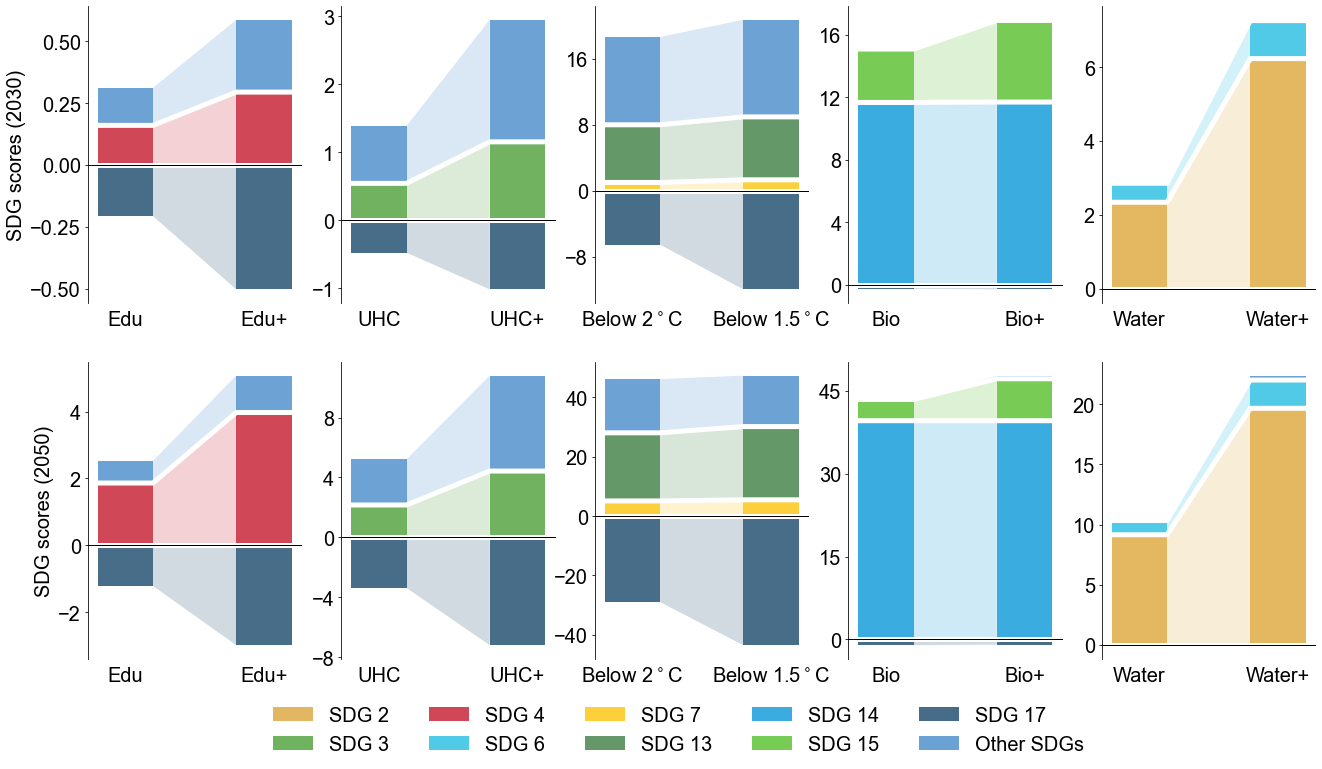

In [6]:
df = load_json_to_df('fig_4.json')
df.columns = [int(i) for i in df.columns[:-3]] + list(df.columns[-3:])

sdg_sdg_colors = ['#E5243B','#DDA63A','#4C9F38','#C5192D','#FF3A21','#26BDE2','#FCC30B','#A21942', '#FD6925','#DD1367','#FD9D24','#BF8B2E','#3F7E44', '#0A97D9', '#56C02B', '#00689D', '#19486A','#478BCA']
axes={}
fig = plt.figure(figsize=(22,12))
plt.rcParams["font.family"] = "Arial"
grid = plt.GridSpec(2, 15, hspace=.2,wspace=0.9)
width = 0.4
target_runs = [['00000', '10000','20000'], ['00000', '01000','02000'], ['00000', '00100','00200'], ['00000', '00010','00020'], ['00000', '00001','00002']]
target_runs_int = [[str(converse_to_int(i,3)) for i in target_run] for target_run in target_runs]
nums_sdgs = [[4,17], [3,17], [7,13,17], [14,15,17], [2, 6 ,17]]
labels = [['Edu','Edu+'], ['UHC','UHC+'], ['Below 2$^\circ$C', 'Below 1.5$^\circ$C'], ['Bio', 'Bio+'], ['Water', 'Water+']]

for num_year, year in enumerate([2030,2050]):
    legs, leg_labs = [], []
    for j in range(5):
        target_run_int, num_sdgs = target_runs_int[j], nums_sdgs[j]

        array_sdg_scores = [np.array(df[(df['policy'].isin(target_run_int)) & (df['SDG']==str(num_sdgs))].get(year)) for num_sdgs in num_sdgs]
        others = np.array(df[(df['policy'].isin(target_run_int)) & (df['SDG']==str(0))].get(year))*17 - sum(array_sdg_scores)
        array_sdg_scores = [(sdg-sdg[0])[1:]*100 for sdg in array_sdg_scores]
        others = (others-others[0])[1:]*100
        array_sdg_scores.insert(-1,others)

        colors = [sdg_sdg_colors[i-1] for i in num_sdgs]
        colors.insert(-1,sdg_sdg_colors[-1])

        sdg_labels = ['SDG {}'.format(i) for i in num_sdgs]
        sdg_labels.insert(-1, 'Other SDGs')

        axes[num_year,j] = fig.add_subplot(grid[num_year,3*j:3*j+3])
        axes[num_year,j].yaxis.set_major_locator(MaxNLocator(5,integer=True))
        for i in range(len(array_sdg_scores)):
            if i==0:
                plt.bar([0,1],array_sdg_scores[i],width=width,color= colors[i],label=sdg_labels[i],alpha =0.8)
                axes[num_year,j].fill_between([width/2,1-width/2],[0,0],array_sdg_scores[i],facecolor= colors[i],alpha=0.2)
                axes[num_year,j].plot([-width/2,width/2,1-width/2,1+width/2],[0,0,0,0],color='white',lw=5)
            elif i==len(array_sdg_scores)-1:
                plt.bar([0,1],array_sdg_scores[i],width=width,bottom=[0,0],color= colors[i],label=sdg_labels[i],alpha =0.8)
                axes[num_year,j].fill_between([width/2,1-width/2],[0,0],array_sdg_scores[i],facecolor= colors[i],alpha=0.2)
            else:
                plt.bar([0,1],array_sdg_scores[i],width=width,bottom=sum(array_sdg_scores[:i]), color= colors[i],label=sdg_labels[i],alpha =0.8)
                axes[num_year,j].fill_between([width/2,1-width/2],sum(array_sdg_scores[:i]),sum(array_sdg_scores[:i+1]),facecolor= colors[i],alpha=0.2)
                axes[num_year,j].plot([-width/2,width/2,1-width/2,1+width/2],[sum(array_sdg_scores[:i])[0],sum(array_sdg_scores[:i])[0],sum(array_sdg_scores[:i])[1],sum(array_sdg_scores[:i])[1]],color='white',lw=5)

        axes[num_year,j].axhline(0, lw=1,color="k", clip_on=False)
        axes[num_year,j].spines['right'].set_visible(False)
        axes[num_year,j].spines['top'].set_visible(False)
        axes[num_year,j].spines['bottom'].set_visible(False)

        axes[num_year,j].tick_params(labelsize=20)
        axes[num_year,j].set_xticks([0,1])
        axes[num_year,j].set_xticklabels(labels[j],fontsize=20)
        axes[num_year,j].tick_params(bottom=False)

        if j==0:
            axes[num_year,j].set_ylabel('SDG scores ({})'.format(year),fontsize=20)
        
        leg, leg_lab = axes[num_year,j].get_legend_handles_labels()
        leg_labs.extend(leg_lab)
        legs.extend(leg)
    if num_year==1:
        seleted_ls = [0,1,2,3,6,7,10,11,14,15]
        seleted_legs = [legs[i] for i in seleted_ls]
        seleted_leg_labs = [leg_labs[i] for i in seleted_ls]

        order = [8,3,0,9,4,5,6,7,2,1]

        axes[num_year,j].legend([seleted_legs[idx] for idx in order], [seleted_leg_labs[idx] for idx in order], loc='center right', fontsize=20,ncol=5,frameon=False, bbox_to_anchor=(-0.1, -0.3, .1, 0.12))
fig.savefig('output/fig_4.pdf',dpi=300,bbox_inches='tight')